In [700]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, silhouette_score
from rfpimp import importances, plot_importances
import seaborn as sns
from sklearn.model_selection import cross_validate
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import Birch
from sklearn.cluster import MeanShift
%matplotlib inline
pd.set_option("display.max_columns", 2000)
pd.set_option('precision', 2) #setting the number of decimel points

In [366]:
df_full=pd.read_csv('data/Seasons_Stats.csv')
df_full.drop(columns='Unnamed: 0', inplace=True)

In [367]:
df=df_full[df_full['Year']>=2005]
df.drop(labels='blank2', axis=1, inplace=True)
df.drop(labels='blanl', axis=1, inplace=True)
df['Year']=df['Year'].astype(int)
df['Year']=pd.to_datetime(df['Year'], format='%Y')
df['Year']=df['Year'].dt.year

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versu

In [369]:
def remove_tot(combined):
    tot_player=combined[combined['Tm']=='TOT']['Player'].values
    for name in tot_player:
        temp=combined[combined['Player']==name]
        tot_index=temp[temp['Tm']=='TOT'].index.values
        for idx in tot_index:
            year=temp.loc[idx]['Year']
            year_index=temp[temp['Year']==year].index.values
            year_temp=temp[temp['Year']==year]
            max_year=((year_temp[year_temp['Tm']!='TOT'])['G'].max())
            team=(year_temp[year_temp['G']==max_year])['Tm'].values
            team=str(team)
            team=team[1:-1]
            combined.at[idx,'Tm']=team
            for element in year_index:
                if element==idx:
                    continue
                else:
                    combined.drop(axis=0, index=element, inplace=True)
    return(combined)

In [370]:
df=remove_tot(df)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [371]:
df['team']=df['Tm']

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [372]:
df.drop(columns='Tm',inplace=True)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [373]:
df['team']=df['team'].apply(lambda x: x[1:4] if len(x)>3 else x)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [374]:
# dropping player with the same name:
#df[df.duplicated(subset=['Year','Player'])]
df=df.drop_duplicates(subset=['Year','Player'], keep=False)

# Selecting the features for the model:


In [375]:
#list of features I assume help predict player performance
# features used for prediction are past year data
# Features for predicting points:
    #prev_ppg
    #prev_ppm
    #prev_min
    #current age
    #prev_FG%
    #prev_FG%
    #prev_eFG% ?
    #prev_FT%
    #prev_FTA
    #prev_3P%
    #prev_3PA
    #prev_personal fouls per game
    
    
    #prev_rebound?
    #prev block?
    #prev steal?
    #prev turnover?
    
#features for predicting rebounds:
#feature for predicting assists:


    
    
# Year - Season
# Player - name
# Pos - Position
# Age - Age
# Tm - Team
# G - Games
# GS - Games Started
# MP - Minutes Played
# PER - Player Efficiency Rating
# TS% - True Shooting %
# 3PAr - 3-Point Attempt Rate
# FTr - Free Throw Rate
# ORB% - Offensive Rebound Percentage
# DRB% - Defensive Rebound Percentage
# TRB% - Total Rebound Percentage
# AST% - Assist Percentage
# STL% - Steal Percentage
# BLK% - Block Percentage
# TOV% - Turnover Percentage
# USG% - Usage Percentage

# OWS - Offensive Win Shares
# DWS - Defensive Win Shares
# WS - Win Shares
# WS/48Win Shares Per 48 Minutes

# OBPM - Offensive Box Plus/Minus
# DBPM - Defensive Box Plus/Minus
# BPM - Box Plus/Minus
# VORP - Value Over Replacement
# FG - Field Goals
# FGA - Field Goal Attempts
# FG% - Field Goal Percentage
# 3P - 3-Point Field Goals
# 3PA - 3-Point Field Goal Attempts
# 3P% - 3-Point Field Goal Percentage
# 2P - 2-Point Field Goals
# 2PA - 2-Point Field Goal Attempts
# 2P% - 2-Point Field Goal Percentage
# eFG% - Effective Field Goal Percentage
# FT - Free Throws
# FTA - Free Throw Attempts
# FT% - Free Throw Percentage
# ORB - Offensive Rebounds
# DRB - Defensive Rebounds
# TRB - Total Rebounds
# AST - Assists
# STL - Steals
# BLK - Blocks
# TOV - Turnovers
# PF - Personal Fouls
# PTS - Points

# https://www.basketball-reference.com/about/glossary.html for additional data

In [376]:
df['ppg']=df['PTS']/df['G']

In [377]:
#adding points per minute:
df['ppm']=df['PTS']/df['MP']

In [247]:
#adding variance and mean per player:

In [378]:
def mean_var(df):
    agrre=pd.DataFrame(columns=['Player','Year','ppg','mean_ppg','var_ppg'])
    player_list=df['Player'].unique()
    for element in player_list:
        temp=df[df['Player']==element][['Player','Year','ppg']]
        if temp.shape[0]==1:
            temp['mean_ppg']=temp['ppg']
            temp['var_ppg']=np.nan
        else:
            temp['mean_ppg']=temp['ppg'].expanding().mean()
            temp['var_ppg']=temp['ppg'].expanding().var()
        agrre=agrre.append(temp)
    agrre['Year']=agrre['Year'].astype(int)
    df=df.merge(agrre[['Player','Year','mean_ppg','var_ppg']],on=['Year','Player'] ,how='left')
    return(df)

In [379]:
df=mean_var(df)

In [382]:
df=df[['Year','team','Player','ppg','ppm','mean_ppg','var_ppg','PTS','Pos','Age','G','GS','MP','PER','TS%','3PAr','FTr','ORB%','DRB%','TRB%','AST%','STL%','BLK%','TOV%','USG%','OWS','DWS','WS','WS/48','OBPM','DBPM',
 'BPM','VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF']]

In [383]:
#df.at[17078,'team']='CHA'

In [471]:
(3*25.15+23.22)/4

24.667499999999997

In [475]:
df[df['Player']=='Ray Allen']['ppg_x']

927     26.44
1386    17.44
1839    18.15
2278    16.30
2723    16.51
3174    14.24
3652    10.92
4120     9.60
Name: ppg_x, dtype: float64

In [472]:
df[df['Player']=='Ray Allen']['ppg_x'].expanding().mean()

927     26.44
1386    21.94
1839    20.68
2278    19.58
2723    18.97
3174    18.18
3652    17.14
4120    16.20
Name: ppg_x, dtype: float64

In [385]:
#writing the data to a csv:
df.to_csv('data/player_2005.csv')

In [386]:
df2=df.copy()

In [103]:
df=df2.copy()

In [521]:
df3=pd.read_csv('data/player_2005.csv')

In [522]:
df3[df3['Player']=='C.J. McCollum']

,Unnamed: 0,Year,team,Player,ppg,ppm,mean_ppg,var_ppg,PTS,Pos,Age,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF
4406,4406,2014,POR,C.J. McCollum,5.29,0.42,5.29,NaN,201.0,SG,22.0,38.0,0.0,476.0,9.0,0.52,0.45,0.19,1.6,9.2,5.4,8.7,1.5,0.3,15.4,20.9,-0.2,0.3,0.2,0.02,-2.1,-2.0,-4.1,-0.3,74.0,178.0,0.42,30.0,80.0,0.38,44.0,98.0,0.45,0.50,23.0,34.0,0.68,7.0,41.0,48.0,27.0,14.0,2.0,35.0,53.0
4897,4897,2015,POR,C.J. McCollum,6.84,0.44,6.06,1.20,424.0,SG,23.0,62.0,3.0,973.0,13.1,0.53,0.38,0.20,1.6,8.3,5.0,10.3,2.3,0.6,10.8,20.5,0.7,1.1,1.8,0.09,-0.4,-0.3,-0.7,0.3,159.0,365.0,0.44,55.0,139.0,0.40,104.0,226.0,0.46,0.51,51.0,73.0,0.70,14.0,77.0,91.0,64.0,43.0,8.0,48.0,81.0
5370,5370,2016,POR,C.J. McCollum,20.82,0.60,10.98,73.23,1666.0,SG,24.0,80.0,80.0,2780.0,17.7,0.54,0.33,0.16,1.8,8.3,5.0,21.6,1.7,0.6,11.4,27.1,4.4,1.7,6.0,0.10,2.5,-2.0,0.4,1.7,641.0,1431.0,0.45,197.0,472.0,0.42,444.0,959.0,0.46,0.52,187.0,226.0,0.83,47.0,212.0,259.0,341.0,97.0,23.0,196.0,187.0
5847,5847,2017,POR,C.J. McCollum,22.96,0.66,13.98,84.69,1837.0,SG,25.0,80.0,80.0,2796.0,19.9,0.58,0.30,0.20,2.4,9.2,5.8,18.0,1.3,1.2,9.9,27.5,6.2,1.4,7.6,0.13,3.3,-2.2,1.0,2.1,692.0,1441.0,0.48,185.0,440.0,0.42,507.0,1001.0,0.51,0.54,268.0,294.0,0.91,60.0,231.0,291.0,285.0,72.0,42.0,172.0,202.0


In [387]:
# adding the previous year data
df['prev_year']=df['Year']-1

In [389]:
# merging previous year data
df=pd.merge(df,df, how='left', left_on=['prev_year','Player'], right_on=['Year','Player'])

In [405]:
df.shape

(4521, 109)

In [20]:
df.columns.shape

(105,)

In [404]:
df=df.dropna(thresh=56)

# -----------------------
## create a model for ppg

In [151]:
    #prev_ppg
    #prev_ppm
    #prev_min
    #current age
    #prev_FG%
    #prev_FG%
    #prev_eFG% ?
    #prev_FT%
    #prev_FTA
    #prev_3P%
    #prev_3PA
    #prev_personal fouls per game
    
    
    #prev_rebound?
    #prev block?
    #prev steal?
    #prev turnover?

In [403]:
df.shape

(4628, 109)

In [407]:
df['3P%_y']=df['3P%_y'].fillna(value=0)
df['FT%_y']=df['FT%_y'].fillna(value=0)
df['3P%_x']=df['3P%_x'].fillna(value=0)
df['FT%_x']=df['FT%_x'].fillna(value=0)
df['ppm_y']=df['ppm_y'].fillna(value=0)
df['MP_y']=df['MP_y'].fillna(value=0)
df['eFG%_y']=df['eFG%_y'].fillna(value=0)
df['FG%_y']=df['FG%_y'].fillna(value=0)
df['ppm_x']=df['ppm_x'].fillna(value=0)


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [424]:
df=df[~df['var_ppg_y'].isna()]

In [425]:
df[df[['ppm_y','mean_ppg_y','var_ppg_y','MP_y','Age_x','FG%_y','FGA_y','eFG%_y','FT%_y','FTA_y','3P%_y','3PA_y','PF_y']].isna().any(axis=1)]

,Year_x,team_x,Player,ppg_x,ppm_x,mean_ppg_x,var_ppg_x,PTS_x,Pos_x,Age_x,G_x,GS_x,MP_x,PER_x,TS%_x,3PAr_x,FTr_x,ORB%_x,DRB%_x,TRB%_x,AST%_x,STL%_x,BLK%_x,TOV%_x,USG%_x,OWS_x,DWS_x,WS_x,WS/48_x,OBPM_x,DBPM_x,BPM_x,VORP_x,FG_x,FGA_x,FG%_x,3P_x,3PA_x,3P%_x,2P_x,2PA_x,2P%_x,eFG%_x,FT_x,FTA_x,FT%_x,ORB_x,DRB_x,TRB_x,AST_x,STL_x,BLK_x,TOV_x,PF_x,prev_year_x,Year_y,team_y,ppg_y,ppm_y,mean_ppg_y,var_ppg_y,PTS_y,Pos_y,Age_y,G_y,GS_y,MP_y,PER_y,TS%_y,3PAr_y,FTr_y,ORB%_y,DRB%_y,TRB%_y,AST%_y,STL%_y,BLK%_y,TOV%_y,USG%_y,OWS_y,DWS_y,WS_y,WS/48_y,OBPM_y,DBPM_y,BPM_y,VORP_y,FG_y,FGA_y,FG%_y,3P_y,3PA_y,3P%_y,2P_y,2PA_y,2P%_y,eFG%_y,FT_y,FTA_y,FT%_y,ORB_y,DRB_y,TRB_y,AST_y,STL_y,BLK_y,TOV_y,PF_y,prev_year_y


In [428]:
df.head()

,Year_x,team_x,Player,ppg_x,ppm_x,mean_ppg_x,var_ppg_x,PTS_x,Pos_x,Age_x,G_x,GS_x,MP_x,PER_x,TS%_x,3PAr_x,FTr_x,ORB%_x,DRB%_x,TRB%_x,AST%_x,STL%_x,BLK%_x,TOV%_x,USG%_x,OWS_x,DWS_x,WS_x,WS/48_x,OBPM_x,DBPM_x,BPM_x,VORP_x,FG_x,FGA_x,FG%_x,3P_x,3PA_x,3P%_x,2P_x,2PA_x,2P%_x,eFG%_x,FT_x,FTA_x,FT%_x,ORB_x,DRB_x,TRB_x,AST_x,STL_x,BLK_x,TOV_x,PF_x,prev_year_x,Year_y,team_y,ppg_y,ppm_y,mean_ppg_y,var_ppg_y,PTS_y,Pos_y,Age_y,G_y,GS_y,MP_y,PER_y,TS%_y,3PAr_y,FTr_y,ORB%_y,DRB%_y,TRB%_y,AST%_y,STL%_y,BLK%_y,TOV%_y,USG%_y,OWS_y,DWS_y,WS_y,WS/48_y,OBPM_y,DBPM_y,BPM_y,VORP_y,FG_y,FGA_y,FG%_y,3P_y,3PA_y,3P%_y,2P_y,2PA_y,2P%_y,eFG%_y,FT_y,FTA_y,FT%_y,ORB_y,DRB_y,TRB_y,AST_y,STL_y,BLK_y,TOV_y,PF_y,prev_year_y
922,2007,SAC,Shareef Abdur-Rahim,9.91,0.39,13.02,12.34,793.0,C,30.0,80.0,45.0,2015.0,13.1,0.52,3.10e-02,0.36,7.0,16.4,11.6,9.2,1.3,1.5,13.3,19.5,1.1,1.7,2.8,0.07,-2.1,0.0,-2.1,-0.1,310.0,654.0,0.47,3.0,20.0,0.15,307.0,634.0,0.48,0.48,170.0,234.0,0.73,122.0,276.0,398.0,109.0,53.0,40.0,116.0,243.0,2006,2006.0,SAC,12.32,0.45,14.58,10.19,887.0,PF,29.0,72.0,30.0,1961.0,17.2,0.59,3.50e-02,0.44,6.4,14.8,10.6,13.2,1.3,1.6,12.5,20.1,4.0,2.2,6.2,0.15,0.4,0.4,0.9,1.4,332.0,632.0,0.53,5.0,22.0,0.23,327.0,610.0,0.54,0.53,218.0,278.0,0.78,106.0,251.0,357.0,149.0,48.0,42.0,108.0,227.0,2005.0
926,2007,CHI,Malik Allen,4.03,0.38,4.78,0.47,242.0,PF,28.0,60.0,1.0,638.0,10.4,0.44,4.00e-03,0.13,7.6,13.7,10.6,4.2,1.4,2.0,7.1,20.5,-0.2,1.1,1.0,0.07,-4.9,-0.3,-5.2,-0.5,107.0,258.0,0.41,0.0,1.0,0.00,107.0,257.0,0.42,0.41,28.0,34.0,0.82,42.0,77.0,119.0,16.0,17.0,16.0,21.0,85.0,2006,2006.0,CHI,4.93,0.38,5.16,0.11,266.0,PF,27.0,54.0,20.0,701.0,11.5,0.50,4.00e-03,0.15,7.2,15.7,11.5,4.9,1.0,1.8,11.4,19.2,0.0,1.0,1.0,0.07,-3.9,0.0,-3.9,-0.3,121.0,247.0,0.49,1.0,1.0,1.00,120.0,246.0,0.49,0.49,23.0,38.0,0.60,44.0,96.0,140.0,20.0,14.0,16.0,34.0,92.0,2005.0
927,2007,SEA,Ray Allen,26.44,0.66,25.15,1.57,1454.0,SG,31.0,55.0,55.0,2219.0,21.6,0.56,3.84e-01,0.27,3.1,10.4,6.7,19.0,1.9,0.4,10.7,29.5,5.4,0.9,6.3,0.14,5.4,-2.1,3.4,3.0,505.0,1153.0,0.44,165.0,443.0,0.37,340.0,710.0,0.48,0.51,279.0,309.0,0.90,57.0,190.0,247.0,228.0,82.0,11.0,154.0,113.0,2006,2006.0,SEA,25.06,0.65,24.50,0.64,1955.0,SG,30.0,78.0,78.0,3022.0,22.2,0.59,4.35e-01,0.24,2.8,10.6,6.6,17.2,1.8,0.4,10.2,27.4,9.8,-0.3,9.5,0.15,6.7,-3.1,3.6,4.2,681.0,1500.0,0.45,269.0,653.0,0.41,412.0,847.0,0.49,0.54,324.0,359.0,0.90,71.0,261.0,332.0,286.0,105.0,16.0,188.0,151.0,2005.0
928,2007,BOS,Tony Allen,11.48,0.47,8.37,7.46,379.0,SG,25.0,33.0,18.0,805.0,17.0,0.60,1.27e-01,0.52,5.1,13.6,9.2,12.5,3.2,1.2,19.1,22.1,0.8,1.1,1.9,0.11,0.0,1.1,1.1,0.6,133.0,259.0,0.51,8.0,33.0,0.24,125.0,226.0,0.55,0.53,105.0,134.0,0.78,35.0,89.0,124.0,56.0,49.0,12.0,75.0,87.0,2006,2006.0,BOS,7.24,0.38,6.81,0.36,369.0,PG,24.0,51.0,9.0,978.0,12.9,0.55,1.24e-01,0.49,4.1,9.6,6.9,11.2,2.7,1.4,16.8,18.8,0.6,1.0,1.7,0.08,-1.6,0.2,-1.4,0.2,129.0,274.0,0.47,11.0,34.0,0.32,118.0,240.0,0.49,0.49,100.0,134.0,0.75,32.0,79.0,111.0,67.0,51.0,18.0,67.0,126.0,2005.0
929,2007,HOU,Rafer Alston,13.27,0.36,13.18,1.13,1088.0,PG,30.0,82.0,82.0,3040.0,12.9,0.50,5.19e-01,0.17,1.1,9.5,5.3,24.1,2.2,0.3,13.4,19.4,1.7,4.9,6.6,0.10,0.4,0.9,1.3,2.5,383.0,1020.0,0.38,192.0,529.0,0.36,191.0,491.0,0.39,0.47,130.0,177.0,0.73,29.0,253.0,282.0,444.0,129.0,10.0,170.0,195.0,2006,2006.0,HOU,12.08,0.31,13.14,2.25,761.0,PG,29.0,63.0,63.0,2431.0,12.6,0.47,4.23e-01,0.19,1.8,10.4,6.1,30.8,2.3,0.5,16.4,18.8,0.2,3.1,3.4,0.07,0.1,0.7,0.8,1.7,280.0,738.0,0.38,102.0,312.0,0.33,178.0,426.0,0.42,0.45,99.0,143.0,0.69,36.0,219.0,255.0,425.0,101.0,15.0,157.0,194.0,2005.0


In [429]:
df2=df.copy()

# think for writing the DF above to CSV

In [78]:
temp=df[['ppg_y','MP_y','Age_x','FG%_y','FGA_y','eFG%_y','FT%_y','FTA_y','3P%_y','3PA_y','PF_y','ppg_x']]

Text(0,0.5,'variance')

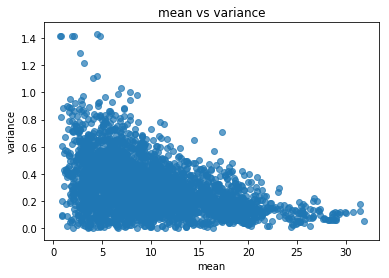

In [524]:
plt.scatter(df['mean_ppg_y'],np.sqrt(df['var_ppg_y'])/df['mean_ppg_y'], alpha =0.7)
plt.title('mean vs variance')
plt.xlabel('mean')
plt.ylabel('variance')

Text(0,0.5,'variance')

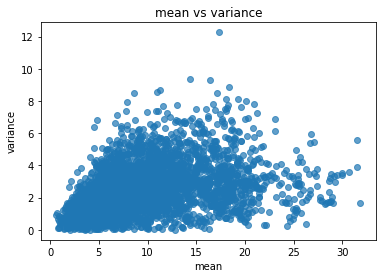

In [523]:
plt.scatter(df['mean_ppg_y'],np.sqrt(df['var_ppg_y']), alpha =0.7)
plt.title('mean vs variance')
plt.xlabel('mean')
plt.ylabel('variance')

In [135]:
# X=df[['ppg_y','MP_y','Age_x','FG%_y','FGA_y','eFG%_y','FT%_y','FTA_y','3P%_y','3PA_y','PF_y']]
# y=df[['ppm_x']]
#this is for ppg

In [105]:
# X=df[['ppm_y','MP_y','Age_x','FG%_y','FGA_y','eFG%_y','FT%_y','FTA_y','3P%_y','3PA_y','PF_y']]
# y=df[['ppm_x']]
# this is for ppm

In [435]:
X=df[['ppg_y','MP_y','Age_x','FG%_y','FGA_y','eFG%_y','FT%_y','FTA_y','3P%_y','3PA_y','PF_y','mean_ppg_y','var_ppg_y']]
y=df[['ppg_x']]
#with var and mean

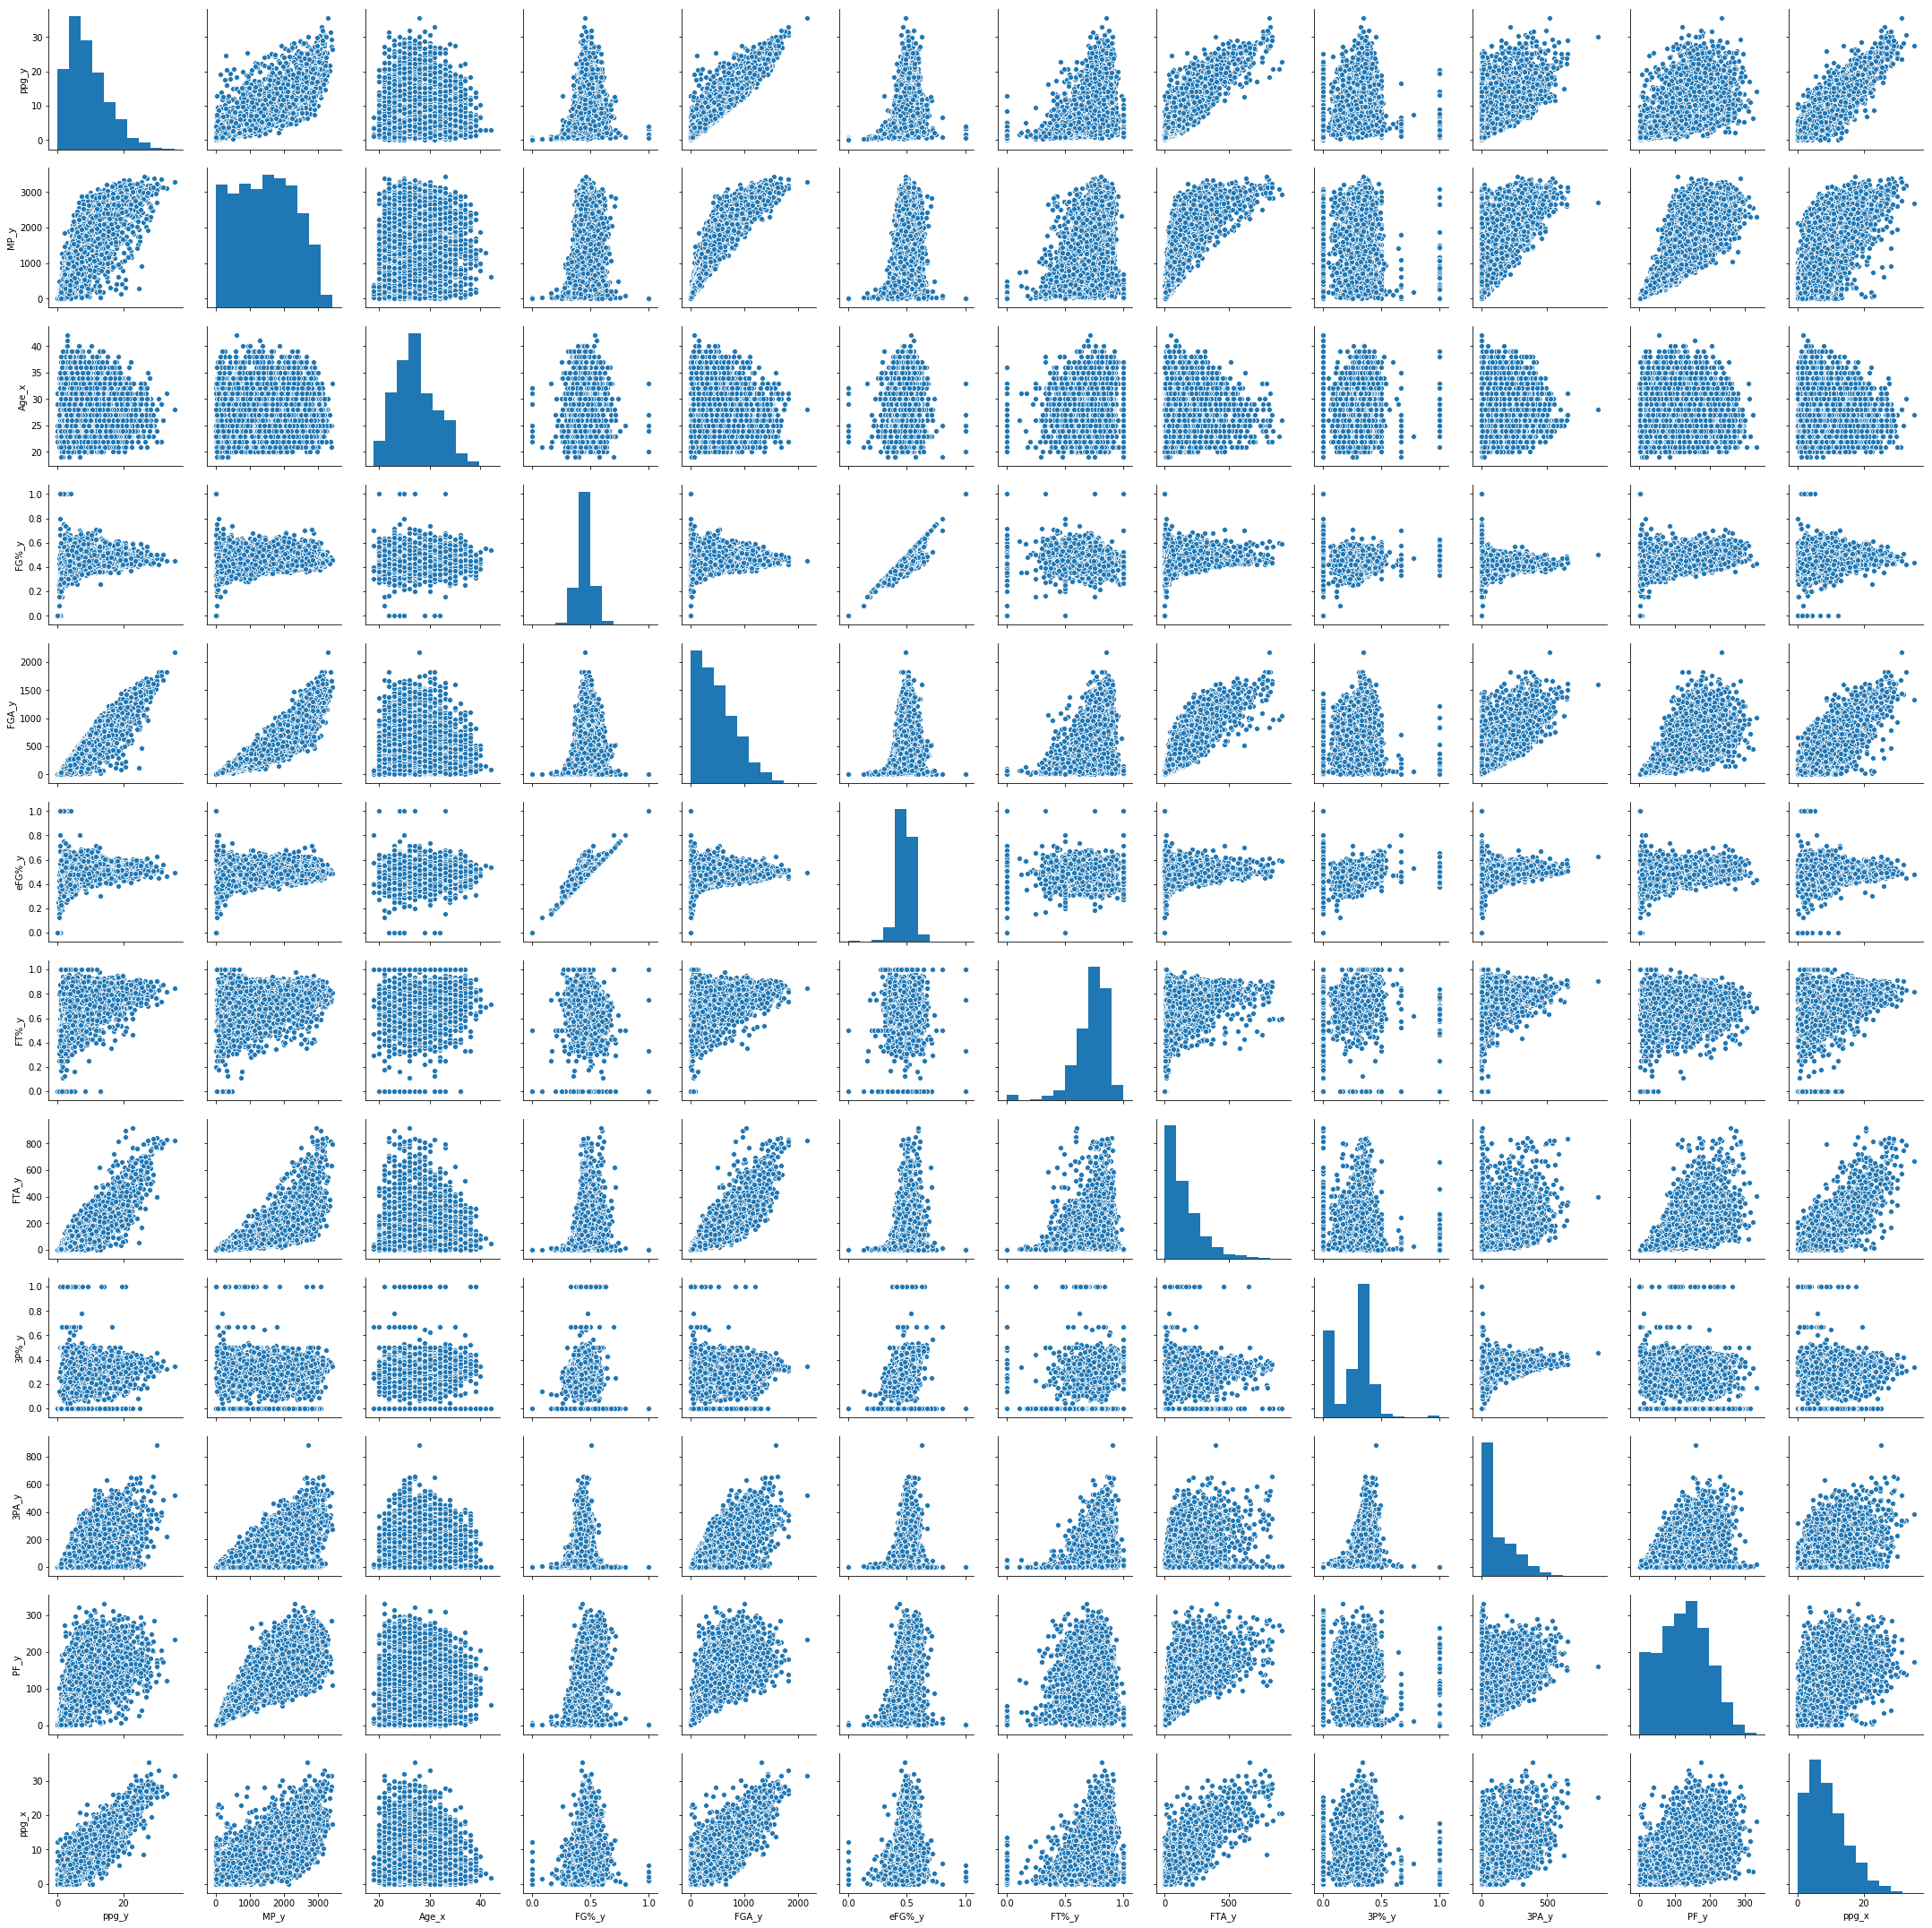

In [79]:
sns.pairplot(temp)

In [436]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [437]:
rf_reg = RandomForestRegressor(max_depth=5, random_state=0,n_estimators=200)

In [438]:
rf_reg.fit(X_train,y_train)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [439]:
y_pred=rf_reg.predict(X_test)

In [440]:
y_test.values

array([[10.47368421],
       [ 7.23076923],
       [14.47297297],
       ...,
       [ 4.63888889],
       [17.44444444],
       [ 7.19230769]])

In [441]:
y_pred.reshape(-1,1)

array([[ 9.18062816],
       [ 8.72247945],
       [16.94751246],
       ...,
       [ 8.84519154],
       [12.52213424],
       [ 8.80332754]])

Text(0,0.5,'residuals')

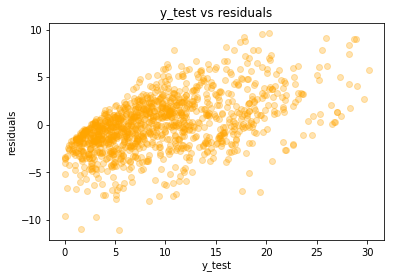

In [456]:
y_pred.reshape(-1,1)
plt.scatter(y_test.values,y_test.values-y_pred.reshape(-1,1),alpha=0.3, c='orange')
plt.title('y_test vs residuals')
plt.xlabel('y_test')
plt.ylabel('residuals')

In [443]:
mean_squared_error(y_test,y_pred)

8.743566890979888

# cross validation

In [444]:
scores=cross_validate(rf_reg,X=X_train,y=y_train,scoring='neg_mean_squared_error')

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


In [445]:
scores

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


{'fit_time': array([0.84383225, 0.82203078, 0.90071106]),
 'score_time': array([0.01140094, 0.01251507, 0.01092482]),
 'test_score': array([-9.29447058, -8.47567207, -8.76032935]),
 'train_score': array([-6.48998665, -6.71969253, -6.58616524])}

In [446]:
-scores['test_score'].mean()

8.843490668809231

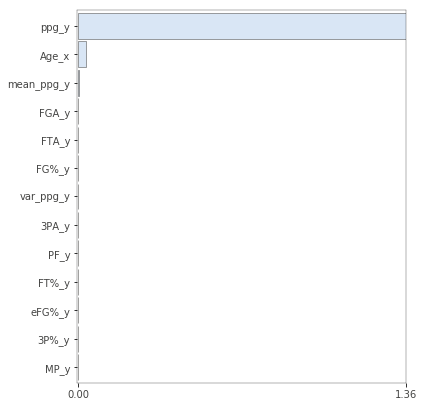

In [447]:

imp =importances(rf_reg, X_test, y_test) # permutation
viz = plot_importances(imp,width=6, vscale=2)
viz.view()

In [449]:
mean_squared_error(y_test,X_test['ppg_y'])

10.033159315161342

In [450]:
imp.values

array([[ 1.35591920e+00],
       [ 3.47332770e-02],
       [ 5.31283043e-03],
       [ 2.22682888e-03],
       [ 1.23951332e-03],
       [ 9.34743527e-04],
       [ 6.97826835e-04],
       [ 6.88376521e-04],
       [ 4.03840396e-04],
       [ 2.76973180e-04],
       [ 8.73824383e-05],
       [-1.49528973e-04],
       [-9.40847721e-04]])

In [193]:
df=df2.copy()

In [476]:
temp_2016=df[df['Year_x']==2016]

In [511]:
bins=pd.cut(temp_2016['Age_x'],5, labels=[1,2,3,4,5])

In [518]:
temp_2016[temp_2016['var_ppg_x']==73.228171176459]

,Year_x,team_x,Player,ppg_x,ppm_x,mean_ppg_x,var_ppg_x,PTS_x,Pos_x,Age_x,G_x,GS_x,MP_x,PER_x,TS%_x,3PAr_x,FTr_x,ORB%_x,DRB%_x,TRB%_x,AST%_x,STL%_x,BLK%_x,TOV%_x,USG%_x,OWS_x,DWS_x,WS_x,WS/48_x,OBPM_x,DBPM_x,BPM_x,VORP_x,FG_x,FGA_x,FG%_x,3P_x,3PA_x,3P%_x,2P_x,2PA_x,2P%_x,eFG%_x,FT_x,FTA_x,FT%_x,ORB_x,DRB_x,TRB_x,AST_x,STL_x,BLK_x,TOV_x,PF_x,prev_year_x,Year_y,team_y,ppg_y,ppm_y,mean_ppg_y,var_ppg_y,PTS_y,Pos_y,Age_y,G_y,GS_y,MP_y,PER_y,TS%_y,3PAr_y,FTr_y,ORB%_y,DRB%_y,TRB%_y,AST%_y,STL%_y,BLK%_y,TOV%_y,USG%_y,OWS_y,DWS_y,WS_y,WS/48_y,OBPM_y,DBPM_y,BPM_y,VORP_y,FG_y,FGA_y,FG%_y,3P_y,3PA_y,3P%_y,2P_y,2PA_y,2P%_y,eFG%_y,FT_y,FTA_y,FT%_y,ORB_y,DRB_y,TRB_y,AST_y,STL_y,BLK_y,TOV_y,PF_y,prev_year_y
5370,2016,POR,C.J. McCollum,20.82,0.6,10.98,73.23,1666.0,SG,24.0,80.0,80.0,2780.0,17.7,0.54,0.33,0.16,1.8,8.3,5.0,21.6,1.7,0.6,11.4,27.1,4.4,1.7,6.0,0.1,2.5,-2.0,0.4,1.7,641.0,1431.0,0.45,197.0,472.0,0.42,444.0,959.0,0.46,0.52,187.0,226.0,0.83,47.0,212.0,259.0,341.0,97.0,23.0,196.0,187.0,2015,2015.0,POR,6.84,0.44,6.06,1.2,424.0,SG,23.0,62.0,3.0,973.0,13.1,0.53,0.38,0.2,1.6,8.3,5.0,10.3,2.3,0.6,10.8,20.5,0.7,1.1,1.8,0.09,-0.4,-0.3,-0.7,0.3,159.0,365.0,0.44,55.0,139.0,0.4,104.0,226.0,0.46,0.51,51.0,73.0,0.7,14.0,77.0,91.0,64.0,43.0,8.0,48.0,81.0,2014.0


In [520]:
df[df['Player']=='C.J. McCollum']

,Year_x,team_x,Player,ppg_x,ppm_x,mean_ppg_x,var_ppg_x,PTS_x,Pos_x,Age_x,G_x,GS_x,MP_x,PER_x,TS%_x,3PAr_x,FTr_x,ORB%_x,DRB%_x,TRB%_x,AST%_x,STL%_x,BLK%_x,TOV%_x,USG%_x,OWS_x,DWS_x,WS_x,WS/48_x,OBPM_x,DBPM_x,BPM_x,VORP_x,FG_x,FGA_x,FG%_x,3P_x,3PA_x,3P%_x,2P_x,2PA_x,2P%_x,eFG%_x,FT_x,FTA_x,FT%_x,ORB_x,DRB_x,TRB_x,AST_x,STL_x,BLK_x,TOV_x,PF_x,prev_year_x,Year_y,team_y,ppg_y,ppm_y,mean_ppg_y,var_ppg_y,PTS_y,Pos_y,Age_y,G_y,GS_y,MP_y,PER_y,TS%_y,3PAr_y,FTr_y,ORB%_y,DRB%_y,TRB%_y,AST%_y,STL%_y,BLK%_y,TOV%_y,USG%_y,OWS_y,DWS_y,WS_y,WS/48_y,OBPM_y,DBPM_y,BPM_y,VORP_y,FG_y,FGA_y,FG%_y,3P_y,3PA_y,3P%_y,2P_y,2PA_y,2P%_y,eFG%_y,FT_y,FTA_y,FT%_y,ORB_y,DRB_y,TRB_y,AST_y,STL_y,BLK_y,TOV_y,PF_y,prev_year_y
5370,2016,POR,C.J. McCollum,20.82,0.60,10.98,73.23,1666.0,SG,24.0,80.0,80.0,2780.0,17.7,0.54,0.33,0.16,1.8,8.3,5.0,21.6,1.7,0.6,11.4,27.1,4.4,1.7,6.0,0.10,2.5,-2.0,0.4,1.7,641.0,1431.0,0.45,197.0,472.0,0.42,444.0,959.0,0.46,0.52,187.0,226.0,0.83,47.0,212.0,259.0,341.0,97.0,23.0,196.0,187.0,2015,2015.0,POR,6.84,0.44,6.06,1.20,424.0,SG,23.0,62.0,3.0,973.0,13.1,0.53,0.38,0.20,1.6,8.3,5.0,10.3,2.3,0.6,10.8,20.5,0.7,1.1,1.8,0.09,-0.4,-0.3,-0.7,0.3,159.0,365.0,0.44,55.0,139.0,0.40,104.0,226.0,0.46,0.51,51.0,73.0,0.70,14.0,77.0,91.0,64.0,43.0,8.0,48.0,81.0,2014.0
5847,2017,POR,C.J. McCollum,22.96,0.66,13.98,84.69,1837.0,SG,25.0,80.0,80.0,2796.0,19.9,0.58,0.30,0.20,2.4,9.2,5.8,18.0,1.3,1.2,9.9,27.5,6.2,1.4,7.6,0.13,3.3,-2.2,1.0,2.1,692.0,1441.0,0.48,185.0,440.0,0.42,507.0,1001.0,0.51,0.54,268.0,294.0,0.91,60.0,231.0,291.0,285.0,72.0,42.0,172.0,202.0,2016,2016.0,POR,20.82,0.60,10.98,73.23,1666.0,SG,24.0,80.0,80.0,2780.0,17.7,0.54,0.33,0.16,1.8,8.3,5.0,21.6,1.7,0.6,11.4,27.1,4.4,1.7,6.0,0.10,2.5,-2.0,0.4,1.7,641.0,1431.0,0.45,197.0,472.0,0.42,444.0,959.0,0.46,0.52,187.0,226.0,0.83,47.0,212.0,259.0,341.0,97.0,23.0,196.0,187.0,2015.0


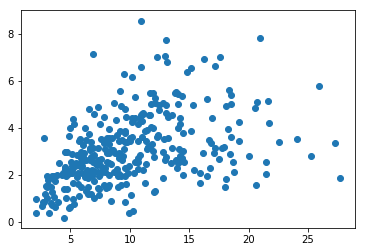

In [559]:
plt.scatter(temp_2016['mean_ppg_x'],np.sqrt(temp_2016['var_ppg_x']))

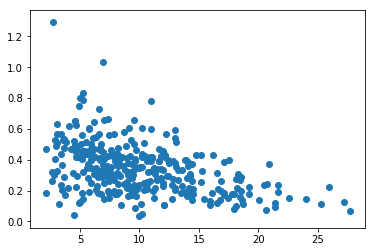

In [570]:
plt.scatter(temp_2016['mean_ppg_x'],np.sqrt(temp_2016['var_ppg_x'])/temp_2016['mean_ppg_x'])

# K-means clustering model:

In [525]:
X=temp_2016[['mean_ppg_y','var_ppg_y']]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [553]:
temp_2016.sample(1)

,Year_x,team_x,Player,ppg_x,ppm_x,mean_ppg_x,var_ppg_x,PTS_x,Pos_x,Age_x,G_x,GS_x,MP_x,PER_x,TS%_x,3PAr_x,FTr_x,ORB%_x,DRB%_x,TRB%_x,AST%_x,STL%_x,BLK%_x,TOV%_x,USG%_x,OWS_x,DWS_x,WS_x,WS/48_x,OBPM_x,DBPM_x,BPM_x,VORP_x,FG_x,FGA_x,FG%_x,3P_x,3PA_x,3P%_x,2P_x,2PA_x,2P%_x,eFG%_x,FT_x,FTA_x,FT%_x,ORB_x,DRB_x,TRB_x,AST_x,STL_x,BLK_x,TOV_x,PF_x,prev_year_x,Year_y,team_y,ppg_y,ppm_y,mean_ppg_y,var_ppg_y,PTS_y,Pos_y,Age_y,G_y,GS_y,MP_y,PER_y,TS%_y,3PAr_y,FTr_y,ORB%_y,DRB%_y,TRB%_y,AST%_y,STL%_y,BLK%_y,TOV%_y,USG%_y,OWS_y,DWS_y,WS_y,WS/48_y,OBPM_y,DBPM_y,BPM_y,VORP_y,FG_y,FGA_y,FG%_y,3P_y,3PA_y,3P%_y,2P_y,2PA_y,2P%_y,eFG%_y,FT_y,FTA_y,FT%_y,ORB_y,DRB_y,TRB_y,AST_y,STL_y,BLK_y,TOV_y,PF_y,prev_year_y,std
Brandon Jennings2016,2016,ORL,Brandon Jennings,6.92,0.38,15.15,15.01,332.0,PG,26.0,48.0,7.0,868.0,13.7,0.49,0.51,0.26,2.0,10.4,6.1,29.2,1.7,0.7,14.4,20.0,0.8,0.7,1.5,0.08,0.3,-1.7,-1.4,0.1,112.0,304.0,0.37,51.0,155.0,0.33,61.0,149.0,0.41,0.45,57.0,78.0,0.73,16.0,80.0,96.0,170.0,29.0,7.0,57.0,57.0,2015,2015.0,DET,15.41,0.54,16.52,2.18,632.0,PG,25.0,41.0,41.0,1173.0,19.7,0.52,0.39,0.26,1.9,8.0,4.8,39.9,1.9,0.3,12.9,26.3,2.6,0.7,3.3,0.14,4.3,-2.5,1.8,1.1,218.0,543.0,0.4,76.0,211.0,0.36,142.0,332.0,0.43,0.47,120.0,143.0,0.84,21.0,83.0,104.0,272.0,44.0,4.0,90.0,64.0,2014.0,3.87


In [536]:
index=temp_2016['Player'] + temp_2016['Year_x'].astype(str)

In [537]:
temp_2016.set_index(index,inplace=True)

In [552]:
temp_2016['std']=np.sqrt(temp_2016['var_ppg_x'])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [554]:
X=temp_2016[['mean_ppg_x','std']]

In [640]:
X=X[['log','std']]

In [641]:
kmeans = KMeans(n_clusters=3, random_state=0)

In [643]:
label=kmeans.fit_predict(X)

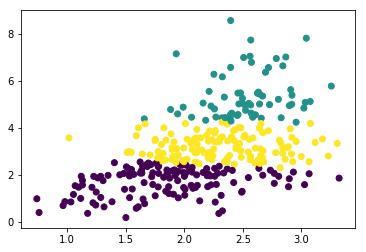

In [645]:
plt.scatter(X['log'],X['std'] ,c=label)

In [638]:
X.sort_values(by=['label'])

,mean_ppg_x,std,label,label2,label3,label1,log
Quincy Acy2016,4.44,1.38,0,1,1,0,1.49
DeAndre Jordan2016,8.38,3.06,0,3,3,0,2.13
Cory Joseph2016,5.36,2.44,0,1,1,0,1.68
Sergey Karasev2016,2.91,1.54,0,1,1,0,1.07
Ryan Kelly2016,6.20,1.90,0,1,1,0,1.82
Kosta Koufos2016,5.15,2.07,0,1,1,0,1.64
Jeremy Lamb2016,6.67,2.64,0,3,3,0,1.90
Shane Larkin2016,5.40,2.35,0,1,1,0,1.69
Alex Len2016,5.77,3.51,0,1,1,0,1.75
Meyers Leonard2016,5.56,2.43,0,1,1,0,1.72


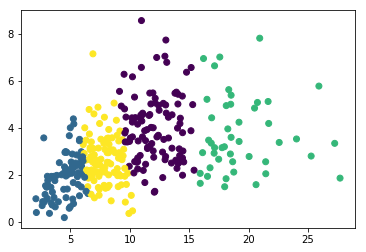

In [568]:
# kmeans2=KMeans(n_clusters=4, random_state=0)
# X['label2']=kmeans2.fit_predict(X)
plt.scatter(X['mean_ppg_x'],X['std'], c=X['label2'])

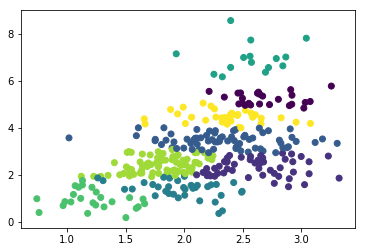

In [703]:
plt.scatter(X['log'],X['std'], c=label6)

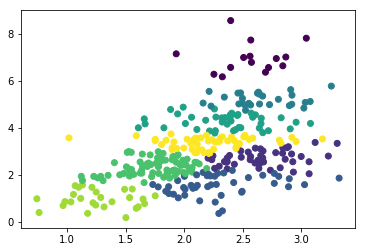

In [702]:
plt.scatter(X['log'],X['std'], c=label5)

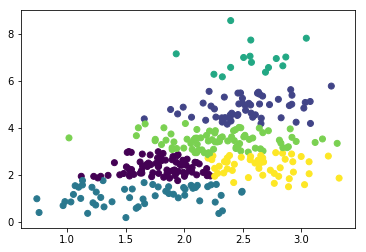

In [670]:
kmeans2=KMeans(n_clusters=6, random_state=0)
label2=kmeans2.fit_predict(X)
plt.scatter(X['log'],X['std'], c=label2)

In [594]:
silhouette_score(X[['mean_ppg_x','std']],X['label1'])

0.5257800143492618

In [576]:
kmeans3 = KMeans(n_clusters=5, random_state=0)

In [577]:
label3=kmeans3.fit_predict(X)

In [578]:
X['label3']=label3

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


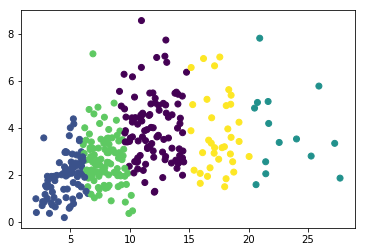

In [579]:
plt.scatter(X['mean_ppg_x'],X['std'], c=X['label3'])

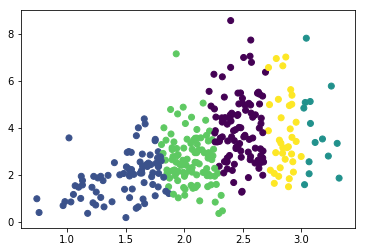

In [648]:
label3_log=kmeans3.fit_predict(X)
plt.scatter(X['log'],X['std'], c=label3)

In [590]:
kmeans1 = KMeans(n_clusters=2, random_state=0)

In [599]:
label1=kmeans1.fit_predict(X[['mean_ppg_x','std']])

In [600]:
X['label1']=label1

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


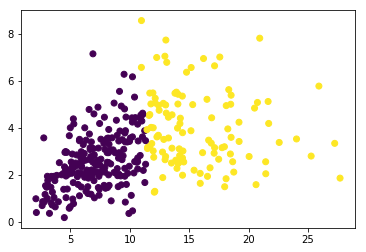

In [601]:
plt.scatter(X['mean_ppg_x'],X['std'], c=X['label1'])

In [609]:
spectral=SpectralClustering(n_clusters=8)

In [610]:
label5=spectral.fit_predict(X[['mean_ppg_x','std']])

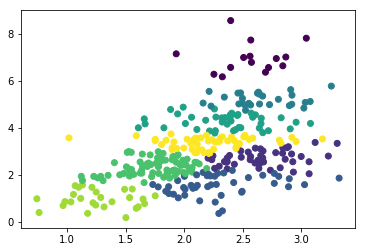

In [658]:
spectral=SpectralClustering(n_clusters=8)
label5=spectral.fit_predict(X)
plt.scatter(X['log'],X['std'], c=label5)

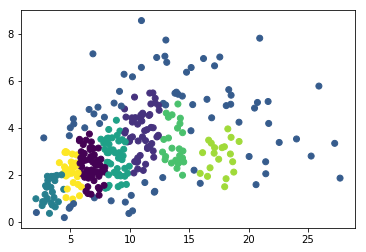

In [611]:
plt.scatter(X['mean_ppg_x'],X['std'], c=label5)

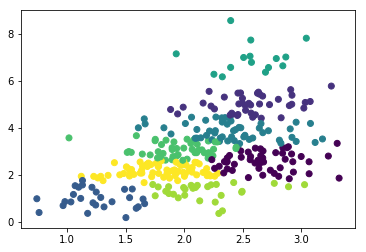

In [744]:
mini=MiniBatchKMeans(n_clusters=8, batch_size=100, random_state=4)
label6=mini.fit_predict(X)
plt.scatter(X['log'],X['std'], c=label6)

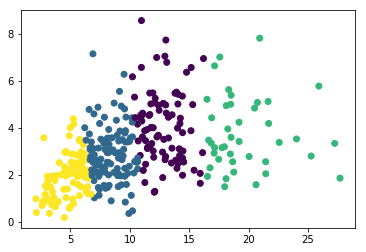

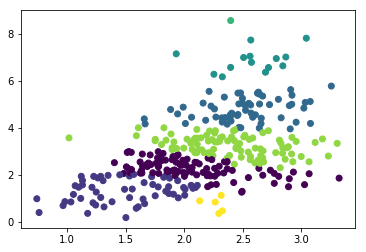

In [682]:
birch=Birch(n_clusters=7)
label7=birch.fit_predict(X)
plt.scatter(X['log'],X['std'], c=label7)

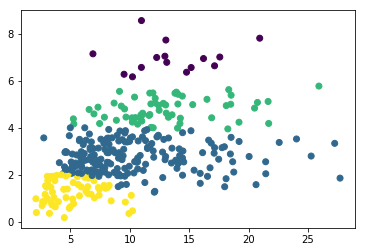

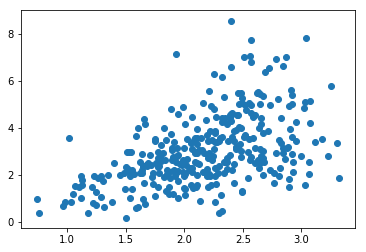

In [631]:
plt.scatter(np.log(X['mean_ppg_x']),X['std'])

In [632]:
X['log']=np.log(X['mean_ppg_x'])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


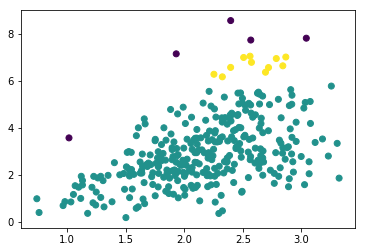

In [698]:
dbscan=DBSCAN(eps=0.5)
label_d=dbscan.fit_predict(X)
plt.scatter(X['log'],X['std'], c=label_d)

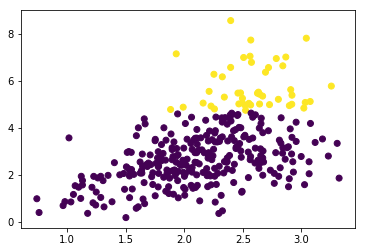

In [701]:
meanshift=MeanShift()
label_mean=meanshift.fit_predict(X)
plt.scatter(X['log'],X['std'], c=label_mean)

# Choose the minibatch clustering model!

In [749]:
# add the log mean to reduce distance between close points so cluster would work better:
df['log_mean_ppg_x']=np.log(df['mean_ppg_x'])
df['log_mean_ppg_y']=np.log(df['mean_ppg_y'])
df['ppg_x_std']=np.sqrt(df['var_ppg_x'])
df['ppg_y_std']=np.sqrt(df['var_ppg_y'])

In [750]:
# clustering players based on years 2016 and prior:
df_2016=df[df['Year_x']==2016]
index=temp_2016['Player'] + temp_2016['Year_x'].astype(str)
df_2016.set_index(index,inplace=True)

In [751]:
X=df_2016[['log_mean_ppg_x','ppg_x_std']]

In [752]:
X.head()

,log_mean_ppg_x,ppg_x_std
Quincy Acy2016,1.49,1.38
Steven Adams2016,1.84,2.62
Arron Afflalo2016,2.47,5.01
Alexis Ajinca2016,1.48,2.06
Cole Aldrich2016,1.12,1.94


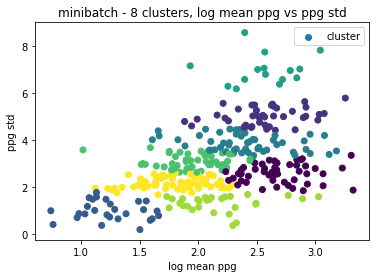

In [761]:
mini=MiniBatchKMeans(n_clusters=8, batch_size=100, random_state=4)
label_m=mini.fit_predict(X)
plt.scatter(X['log_mean_ppg_x'],X['ppg_x_std'], c=label_m,label='cluster')
plt.title('minibatch - 8 clusters, log mean ppg vs ppg std')
plt.xlabel('log mean ppg')
plt.ylabel('ppg std')
plt.legend()

In [763]:
df_2016['label']=label_m

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [802]:
df_2016.shape

(335, 114)

In [776]:
df_2016.sort_values(by=['label'])[['label','mean_ppg_x','ppg_x_std']]

,label,mean_ppg_x,ppg_x_std
Randy Foye2016,0,10.88,2.82
Michael Carter-Williams2016,0,14.28,2.59
Roy Hibbert2016,0,10.42,2.56
Chris Paul2016,0,18.75,2.12
Chandler Parsons2016,0,14.20,2.82
Tony Parker2016,0,17.48,2.66
Victor Oladipo2016,0,15.93,2.06
Jrue Holiday2016,0,14.16,3.10
Jameer Nelson2016,0,12.02,2.75
Al Horford2016,0,14.44,2.72


In [777]:
df_index=df['Player'] + df['Year_x'].astype(str)

In [792]:
dfi.head()

,Year_x,team_x,Player,ppg_x,ppm_x,mean_ppg_x,var_ppg_x,PTS_x,Pos_x,Age_x,G_x,GS_x,MP_x,PER_x,TS%_x,3PAr_x,FTr_x,ORB%_x,DRB%_x,TRB%_x,AST%_x,STL%_x,BLK%_x,TOV%_x,USG%_x,OWS_x,DWS_x,WS_x,WS/48_x,OBPM_x,DBPM_x,BPM_x,VORP_x,FG_x,FGA_x,FG%_x,3P_x,3PA_x,3P%_x,2P_x,2PA_x,2P%_x,eFG%_x,FT_x,FTA_x,FT%_x,ORB_x,DRB_x,TRB_x,AST_x,STL_x,BLK_x,TOV_x,PF_x,prev_year_x,Year_y,team_y,ppg_y,ppm_y,mean_ppg_y,var_ppg_y,PTS_y,Pos_y,Age_y,G_y,GS_y,MP_y,PER_y,TS%_y,3PAr_y,FTr_y,ORB%_y,DRB%_y,TRB%_y,AST%_y,STL%_y,BLK%_y,TOV%_y,USG%_y,OWS_y,DWS_y,WS_y,WS/48_y,OBPM_y,DBPM_y,BPM_y,VORP_y,FG_y,FGA_y,FG%_y,3P_y,3PA_y,3P%_y,2P_y,2PA_y,2P%_y,eFG%_y,FT_y,FTA_y,FT%_y,ORB_y,DRB_y,TRB_y,AST_y,STL_y,BLK_y,TOV_y,PF_y,prev_year_y,log_mean_ppg_x,log_mean_ppg_y,ppg_x_std,ppg_y_std
Shareef Abdur-Rahim2007,2007,SAC,Shareef Abdur-Rahim,9.91,0.39,13.02,12.34,793.0,C,30.0,80.0,45.0,2015.0,13.1,0.52,3.10e-02,0.36,7.0,16.4,11.6,9.2,1.3,1.5,13.3,19.5,1.1,1.7,2.8,0.07,-2.1,0.0,-2.1,-0.1,310.0,654.0,0.47,3.0,20.0,0.15,307.0,634.0,0.48,0.48,170.0,234.0,0.73,122.0,276.0,398.0,109.0,53.0,40.0,116.0,243.0,2006,2006.0,SAC,12.32,0.45,14.58,10.19,887.0,PF,29.0,72.0,30.0,1961.0,17.2,0.59,3.50e-02,0.44,6.4,14.8,10.6,13.2,1.3,1.6,12.5,20.1,4.0,2.2,6.2,0.15,0.4,0.4,0.9,1.4,332.0,632.0,0.53,5.0,22.0,0.23,327.0,610.0,0.54,0.53,218.0,278.0,0.78,106.0,251.0,357.0,149.0,48.0,42.0,108.0,227.0,2005.0,2.57,2.68,3.51,3.19
Malik Allen2007,2007,CHI,Malik Allen,4.03,0.38,4.78,0.47,242.0,PF,28.0,60.0,1.0,638.0,10.4,0.44,4.00e-03,0.13,7.6,13.7,10.6,4.2,1.4,2.0,7.1,20.5,-0.2,1.1,1.0,0.07,-4.9,-0.3,-5.2,-0.5,107.0,258.0,0.41,0.0,1.0,0.00,107.0,257.0,0.42,0.41,28.0,34.0,0.82,42.0,77.0,119.0,16.0,17.0,16.0,21.0,85.0,2006,2006.0,CHI,4.93,0.38,5.16,0.11,266.0,PF,27.0,54.0,20.0,701.0,11.5,0.50,4.00e-03,0.15,7.2,15.7,11.5,4.9,1.0,1.8,11.4,19.2,0.0,1.0,1.0,0.07,-3.9,0.0,-3.9,-0.3,121.0,247.0,0.49,1.0,1.0,1.00,120.0,246.0,0.49,0.49,23.0,38.0,0.60,44.0,96.0,140.0,20.0,14.0,16.0,34.0,92.0,2005.0,1.57,1.64,0.69,0.33
Ray Allen2007,2007,SEA,Ray Allen,26.44,0.66,25.15,1.57,1454.0,SG,31.0,55.0,55.0,2219.0,21.6,0.56,3.84e-01,0.27,3.1,10.4,6.7,19.0,1.9,0.4,10.7,29.5,5.4,0.9,6.3,0.14,5.4,-2.1,3.4,3.0,505.0,1153.0,0.44,165.0,443.0,0.37,340.0,710.0,0.48,0.51,279.0,309.0,0.90,57.0,190.0,247.0,228.0,82.0,11.0,154.0,113.0,2006,2006.0,SEA,25.06,0.65,24.50,0.64,1955.0,SG,30.0,78.0,78.0,3022.0,22.2,0.59,4.35e-01,0.24,2.8,10.6,6.6,17.2,1.8,0.4,10.2,27.4,9.8,-0.3,9.5,0.15,6.7,-3.1,3.6,4.2,681.0,1500.0,0.45,269.0,653.0,0.41,412.0,847.0,0.49,0.54,324.0,359.0,0.90,71.0,261.0,332.0,286.0,105.0,16.0,188.0,151.0,2005.0,3.22,3.20,1.25,0.80
Tony Allen2007,2007,BOS,Tony Allen,11.48,0.47,8.37,7.46,379.0,SG,25.0,33.0,18.0,805.0,17.0,0.60,1.27e-01,0.52,5.1,13.6,9.2,12.5,3.2,1.2,19.1,22.1,0.8,1.1,1.9,0.11,0.0,1.1,1.1,0.6,133.0,259.0,0.51,8.0,33.0,0.24,125.0,226.0,0.55,0.53,105.0,134.0,0.78,35.0,89.0,124.0,56.0,49.0,12.0,75.0,87.0,2006,2006.0,BOS,7.24,0.38,6.81,0.36,369.0,PG,24.0,51.0,9.0,978.0,12.9,0.55,1.24e-01,0.49,4.1,9.6,6.9,11.2,2.7,1.4,16.8,18.8,0.6,1.0,1.7,0.08,-1.6,0.2,-1.4,0.2,129.0,274.0,0.47,11.0,34.0,0.32,118.0,240.0,0.49,0.49,100.0,134.0,0.75,32.0,79.0,111.0,67.0,51.0,18.0,67.0,126.0,2005.0,2.12,1.92,2.73,0.60
Rafer Alston2007,2007,HOU,Rafer Alston,13.27,0.36,13.18,1.13,1088.0,PG,30.0,82.0,82.0,3040.0,12.9,0.50,5.19e-01,0.17,1.1,9.5,5.3,24.1,2.2,0.3,13.4,19.4,1.7,4.9,6.6,0.10,0.4,0.9,1.3,2.5,383.0,1020.0,0.38,192.0,529.0,0.36,191.0,491.0,0.39,0.47,130.0,177.0,0.73,29.0,253.0,282.0,444.0,129.0,10.0,170.0,195.0,2006,2006.0,HOU,12.08,0.31,13.14,2.25,761.0,PG,29.0,63.0,63.0,2431.0,12.6,0.47,4.23e-01,0.19,1.8,10.4,6.1,30.8,2.3,0.5,16.4,18.8,0.2,3.1,3.4,0.07,0.1,0.7,0.8,1.7,280.0,738.0,0.38,102.0,312.0,0.33,178.0,426.0,0.42,0.45,99.0,143.0,0.69,36.0,219.0,255.0,425.0,101.0,15.0,157.0,194.0,2005.0,2.58,2.58,1.06,1.50


In [778]:
dfi=df.set_index(df_index,inplace=False)

In [790]:
dfi.columns.values

array(['Year_x', 'team_x', 'Player', 'ppg_x', 'ppm_x', 'mean_ppg_x',
       'var_ppg_x', 'PTS_x', 'Pos_x', 'Age_x', 'G_x', 'GS_x', 'MP_x',
       'PER_x', 'TS%_x', '3PAr_x', 'FTr_x', 'ORB%_x', 'DRB%_x', 'TRB%_x',
       'AST%_x', 'STL%_x', 'BLK%_x', 'TOV%_x', 'USG%_x', 'OWS_x', 'DWS_x',
       'WS_x', 'WS/48_x', 'OBPM_x', 'DBPM_x', 'BPM_x', 'VORP_x', 'FG_x',
       'FGA_x', 'FG%_x', '3P_x', '3PA_x', '3P%_x', '2P_x', '2PA_x',
       '2P%_x', 'eFG%_x', 'FT_x', 'FTA_x', 'FT%_x', 'ORB_x', 'DRB_x',
       'TRB_x', 'AST_x', 'STL_x', 'BLK_x', 'TOV_x', 'PF_x', 'prev_year_x',
       'Year_y', 'team_y', 'ppg_y', 'ppm_y', 'mean_ppg_y', 'var_ppg_y',
       'PTS_y', 'Pos_y', 'Age_y', 'G_y', 'GS_y', 'MP_y', 'PER_y', 'TS%_y',
       '3PAr_y', 'FTr_y', 'ORB%_y', 'DRB%_y', 'TRB%_y', 'AST%_y',
       'STL%_y', 'BLK%_y', 'TOV%_y', 'USG%_y', 'OWS_y', 'DWS_y', 'WS_y',
       'WS/48_y', 'OBPM_y', 'DBPM_y', 'BPM_y', 'VORP_y', 'FG_y', 'FGA_y',
       'FG%_y', '3P_y', '3PA_y', '3P%_y', '2P_y', '2PA_y', '2P%_y'

In [786]:
#Add the label to the df:
dfi

,Year_x,team_x,Player,ppg_x,ppm_x,mean_ppg_x,var_ppg_x,PTS_x,Pos_x,Age_x,G_x,GS_x,MP_x,PER_x,TS%_x,3PAr_x,FTr_x,ORB%_x,DRB%_x,TRB%_x,AST%_x,STL%_x,BLK%_x,TOV%_x,USG%_x,OWS_x,DWS_x,WS_x,WS/48_x,OBPM_x,DBPM_x,BPM_x,VORP_x,FG_x,FGA_x,FG%_x,3P_x,3PA_x,3P%_x,2P_x,2PA_x,2P%_x,eFG%_x,FT_x,FTA_x,FT%_x,ORB_x,DRB_x,TRB_x,AST_x,STL_x,BLK_x,TOV_x,PF_x,prev_year_x,Year_y,team_y,ppg_y,ppm_y,mean_ppg_y,var_ppg_y,PTS_y,Pos_y,Age_y,G_y,GS_y,MP_y,PER_y,TS%_y,3PAr_y,FTr_y,ORB%_y,DRB%_y,TRB%_y,AST%_y,STL%_y,BLK%_y,TOV%_y,USG%_y,OWS_y,DWS_y,WS_y,WS/48_y,OBPM_y,DBPM_y,BPM_y,VORP_y,FG_y,FGA_y,FG%_y,3P_y,3PA_y,3P%_y,2P_y,2PA_y,2P%_y,eFG%_y,FT_y,FTA_y,FT%_y,ORB_y,DRB_y,TRB_y,AST_y,STL_y,BLK_y,TOV_y,PF_y,prev_year_y,log_mean_ppg_x,log_mean_ppg_y,ppg_x_std,ppg_y_std
Shareef Abdur-Rahim2007,2007,SAC,Shareef Abdur-Rahim,9.91,0.39,13.02,12.34,793.0,C,30.0,80.0,45.0,2015.0,13.1,0.52,0.03,0.36,7.0,16.4,11.6,9.2,1.3,1.5,13.3,19.5,1.1,1.7,2.8,0.07,-2.1,0.0,-2.1,-0.1,310.0,654.0,0.47,3.0,20.0,0.15,307.0,634.0,0.48,0.48,170.0,234.0,0.73,122.0,276.0,398.0,109.0,53.0,40.0,116.0,243.0,2006,2006.0,SAC,12.32,0.45,14.58,10.19,887.0,PF,29.0,72.0,30.0,1961.0,17.2,0.59,0.04,0.44,6.4,14.8,10.6,13.2,1.3,1.6,12.5,20.1,4.0,2.2,6.2,0.15,0.4,0.4,0.9,1.4,332.0,632.0,0.53,5.0,22.0,0.23,327.0,610.0,0.54,0.53,218.0,278.0,0.78,106.0,251.0,357.0,149.0,48.0,42.0,108.0,227.0,2005.0,2.57,2.68,3.51,3.19


In [ ]:
'ppg_y','MP_y','Age_x','FG%_y','FGA_y','eFG%_y','FT%_y','FTA_y','3P%_y','3PA_y','PF_y','mean_ppg_y','var_ppg_y'

In [793]:
dfi_small=dfi[['Year_x', 'team_x', 'Player','log_mean_ppg_x','ppg_x_std', 'ppg_x', 'ppm_x', 'mean_ppg_x',
       'var_ppg_x', 'PTS_x', 'Pos_x', 'Age_x', 'G_x','MP_x','FGA_x','FG%_x','3PA_x','3P%_x','2PA_x','2P%_x','eFG%_x',
        'FTA_x','FT%_x','prev_year_x','ppg_y', 'ppm_y','log_mean_ppg_y','ppg_y_std', 'mean_ppg_y', 'var_ppg_y','PTS_y','Pos_y', 'Age_y',
            'G_y','MP_y','FGA_y','FG%_y','3PA_y','3P%_y','2PA_y', '2P%_y','eFG%_y','FTA_y', 'FT%_y']]

# making the pipeline 

In [851]:
def add_label(dfi,year):
    
    df_train=dfi[dfi['Year_x']==year-1]
    mini_train=MiniBatchKMeans(n_clusters=8, batch_size=100, random_state=4)
    X_cluster_train=df_train[['log_mean_ppg_y','ppg_y_std']]
    label_train=mini_train.fit_predict(X_cluster_train)
    df_train['label']=label_train
    df_train=pd.get_dummies(df_train,columns=['label'])
 

    df_year=df[df['Year_x']==year]
    mini=MiniBatchKMeans(n_clusters=8, batch_size=100, random_state=4)
    X_cluster_test=df_year[['log_mean_ppg_y','ppg_y_std']]
    
    label_test=mini.fit_predict(X_cluster_test)
    df_year['label']=label_test
    df_year=pd.get_dummies(df_year,columns=['label'])
    
#     plt.scatter(X['log_mean_ppg_y'],X['ppg_y_std'], c=label_m,label='clusters')
#     plt.title('minibatch - 8 clusters, log mean ppg vs ppg std')
#     plt.xlabel('log mean ppg')
#     plt.ylabel('ppg std')
#     plt.legend()
#     plt.show()
    
    X_train=df_train[['Age_x','ppg_y','mean_ppg_y','log_mean_ppg_y','var_ppg_y','ppg_y_std','MP_y','FG%_y','FGA_y','eFG%_y','FT%_y','FTA_y','3P%_y','3PA_y','PF_y','label_0','label_1','label_2','label_3','label_4','label_5','label_6','label_7']]
    y_train=df_train[['ppg_x']]
    X_test=df_year[['Age_x','ppg_y','mean_ppg_y','log_mean_ppg_y','var_ppg_y','ppg_y_std','MP_y','FG%_y','FGA_y','eFG%_y','FT%_y','FTA_y','3P%_y','3PA_y','PF_y','label_0','label_1','label_2','label_3','label_4','label_5','label_6','label_7']]
    y_test=df_year[['ppg_x']]
    
    
    return(X_train,y_train,X_test,y_test)
    

In [835]:
# dfi_small[dfi_small['Player']=='Ray Allen'][['Year_x','ppg_x','mean_ppg_x','ppg_y','mean_ppg_y']]

In [852]:
X_train,y_train,X_test,y_test=add_label(dfi,2012)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [853]:
rf_reg = RandomForestRegressor(max_depth=5, random_state=0,n_estimators=200)
rf_reg.fit(X_train,y_train)
y_pred=rf_reg.predict(X_test)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Text(0,0.5,'residuals')

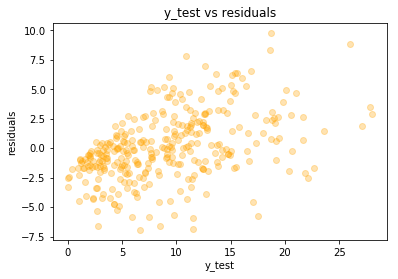

In [854]:
y_pred.reshape(-1,1)
plt.scatter(y_test.values,y_test.values-y_pred.reshape(-1,1),alpha=0.3, c='orange')
plt.title('y_test vs residuals')
plt.xlabel('y_test')
plt.ylabel('residuals')

In [864]:
scores=cross_validate(rf_reg,X=X_train,y=y_train,scoring='neg_mean_squared_error')
-scores['test_score'].mean()

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), wh

{'fit_time': array([0.26249599, 0.24164391, 0.24774122]),
 'score_time': array([0.00656629, 0.00697803, 0.00686288]),
 'test_score': array([ -7.9502373 , -10.21875038,  -9.37147824]),
 'train_score': array([-3.35993236, -2.81114714, -3.09379205])}

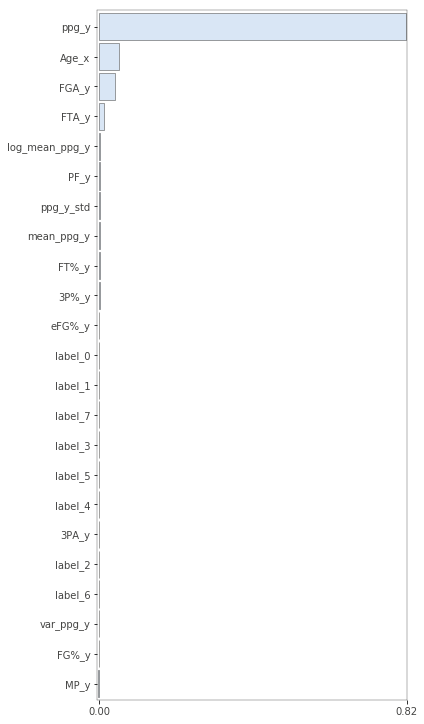

In [860]:
imp =importances(rf_reg, X_test, y_test) # permutation
viz = plot_importances(imp,width=6, vscale=2)
viz.view()

In [862]:
mean_squared_error(y_test,X_test['ppg_y'])

8.972459993683001

In [863]:
mean_squared_error(y_test,y_pred)

8.29411443974366

#  _______Try using all prev data as training data_______

In [927]:
def add_label2(dfi,year):
    
    df_train=dfi[dfi['Year_x']<year]
    mini_train=MiniBatchKMeans(n_clusters=8, batch_size=100, random_state=4)
    X_cluster_train=df_train[['log_mean_ppg_y','ppg_y_std']]
    label_train=mini_train.fit_predict(X_cluster_train)

    df_train['label']=label_train
    df_train=pd.get_dummies(df_train,columns=['label'])
 

    df_year=dfi[dfi['Year_x']==year]
    mini=MiniBatchKMeans(n_clusters=8, batch_size=100, random_state=4)
    X_cluster_test=df_year[['log_mean_ppg_y','ppg_y_std']]
    
    label_test=mini.fit_predict(X_cluster_test)
    df_year['label']=label_test
    df_year=pd.get_dummies(df_year,columns=['label'])
    
#     plt.scatter(X['log_mean_ppg_y'],X['ppg_y_std'], c=label_m,label='clusters')
#     plt.title('minibatch - 8 clusters, log mean ppg vs ppg std')
#     plt.xlabel('log mean ppg')
#     plt.ylabel('ppg std')
#     plt.legend()
#     plt.show()
    
    X_train=df_train[['Age_x','ppg_y','mean_ppg_y','log_mean_ppg_y','var_ppg_y','ppg_y_std','MP_y','FG%_y','FGA_y','eFG%_y','FT%_y','FTA_y','3P%_y','3PA_y','PF_y','label_0','label_1','label_2','label_3','label_4','label_5','label_6','label_7']]
    y_train=df_train[['ppg_x']]
    X_test=df_year[['Age_x','ppg_y','mean_ppg_y','log_mean_ppg_y','var_ppg_y','ppg_y_std','MP_y','FG%_y','FGA_y','eFG%_y','FT%_y','FTA_y','3P%_y','3PA_y','PF_y','label_0','label_1','label_2','label_3','label_4','label_5','label_6','label_7']]
    y_test=df_year[['ppg_x']]
    return (X_train,y_train,X_test,y_test,label_train,label_test)
    

In [928]:
X_train,y_train,X_test,y_test,label_train,label_test=add_label2(dfi,2012)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [933]:
type(label_train)

numpy.ndarray

In [929]:
rf_reg2 = RandomForestRegressor(max_depth=5, random_state=0,n_estimators=200)
rf_reg2.fit(X_train,y_train)
y_pred2=rf_reg2.predict(X_test)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [934]:
type(y_pred)

numpy.ndarray

Text(0,0.5,'residuals')

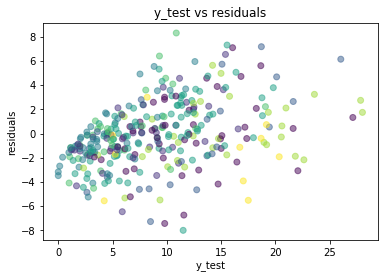

In [1069]:
y_pred.reshape(-1,1)
plt.scatter(y_test.values,y_test.values-y_pred2.reshape(-1,1),alpha=0.5, c=label_test.reshape(-1,1))
plt.title('y_test vs residuals')
plt.xlabel('y_test')
plt.ylabel('residuals')

In [931]:
mean_squared_error(y_test,X_test['ppg_y'])

8.972459993683001

In [932]:
mean_squared_error(y_test,y_pred)

8.29411443974366

# color map

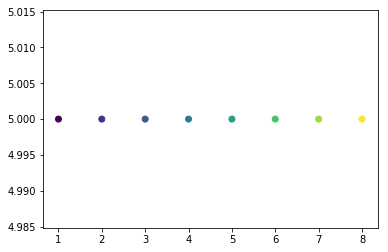

In [924]:
plt.scatter(np.array([1,2,3,4,5,6,7,8]).reshape(-1,1),np.array([5,5,5,5,5,5,5,5]).reshape(-1,1), c=np.array([0,1,2,3,4,5,6,7]).reshape(-1,1))

In [1351]:
dfi['Year_x'].min()

2007

# Creating a class

In [1407]:
class ModelP:
    def __init__(self,year):
        self.year=year
        self.X_train=pd.DataFrame()
        self.y_train=pd.DataFrame()
        self.X_test=pd.DataFrame()
        self.y_test=pd.DataFrame()
        self.label_train=np.array([])
        self.label_test=np.array([])
        self.y_pred=np.array([])
        self.rf_reg=RandomForestRegressor(max_depth=5, random_state=0,n_estimators=200)
        
    def fit(self,df):
        df_train=df[df['Year_x']<self.year]
        mini_train=MiniBatchKMeans(n_clusters=8, batch_size=100, random_state=4)
        X_cluster_train=df_train[['log_mean_ppg_y','ppg_y_std']]
        
        self.label_train=mini_train.fit_predict(X_cluster_train)

        df_train['label']=self.label_train
        df_train=pd.get_dummies(df_train,columns=['label'])
 

        df_year=df[df['Year_x']==self.year]
        mini=MiniBatchKMeans(n_clusters=8, batch_size=100, random_state=4)
        X_cluster_test=df_year[['log_mean_ppg_y','ppg_y_std']]
    
        self.label_test=mini.fit_predict(X_cluster_test)
        df_year['label']=self.label_test
        df_year=pd.get_dummies(df_year,columns=['label'])
        
        self.X_train=df_train[['Age_x','ppg_y','mean_ppg_y','log_mean_ppg_y','var_ppg_y','ppg_y_std','MP_y','FG%_y','FGA_y','eFG%_y','FT%_y','FTA_y','3P%_y','3PA_y','PF_y','label_0','label_1','label_2','label_3','label_4','label_5','label_6','label_7']]
        self.y_train=df_train[['ppg_x']]
        self.X_test=df_year[['Age_x','ppg_y','mean_ppg_y','log_mean_ppg_y','var_ppg_y','ppg_y_std','MP_y','FG%_y','FGA_y','eFG%_y','FT%_y','FTA_y','3P%_y','3PA_y','PF_y','label_0','label_1','label_2','label_3','label_4','label_5','label_6','label_7']]
        self.y_test=df_year[['ppg_x']]
        
    def model_predict(self):
        self.rf_reg.fit(self.X_train,self.y_train)
        self.y_pred=self.rf_reg.predict(self.X_test)
        return (self.y_pred)
    
    def score(self):
        mse=mean_squared_error(self.y_test,self.y_pred)
        print('The MSE is : {}'.format(mse))
        
        benchmark_error=mean_squared_error(self.y_test,self.X_test['ppg_y'])
        print('The benchmark MSE is : {}'.format(benchmark_error))
        return (mse)
        
    def plots(self):
        hand={}
        self.y_pred.reshape(-1,1)
        temp=pd.DataFrame(index=self.y_test.index, columns=['y_test','y_pred','cluster'])
        temp['y_test']=self.y_test
        temp['y_pred']=self.y_pred
        temp['cluster']=self.label_test
        cmap={0:'red',1:'orange', 2:'green', 3:'blue', 4:'magenta',5:'cyan',6:'black',7:'forestgreen'}
        for element in temp['cluster'].unique():
            class_temp=temp[temp['cluster']==element]
            hand[element]=plt.scatter(class_temp['y_test'].values,class_temp['y_test'].values-class_temp['y_pred'].values,alpha=0.6, color=cmap[element],marker='.' ,label='clusters {}'.format(element))
        plt.title('y_test vs residuals')
        plt.xlabel('y_test')
        plt.ylabel('residuals')
        plt.legend((hand[0],hand[1],hand[2],hand[3],hand[4],hand[5],hand[6],hand[7]), ('cluster 1','cluster 2','cluster 3','cluster 4','cluster 5','cluster 6','cluster 7'))
        plt.show()
    def clusters(self):
        pass
    
    def importance(self):
        imp =importances(self.rf_reg, self.X_test, self.y_test) # permutation importances
        viz = plot_importances(imp,width=6, vscale=2)
        viz.view()
        print(imp)
    
        
    
    
    

In [1384]:
model=ModelP(2012)

In [1385]:
model.fit(dfi)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [1386]:
y_pred=model.model_predict()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [1387]:
model.score()

The MSE is : 7.4674771986233734
The benchmark MSE is : 8.972459993683001


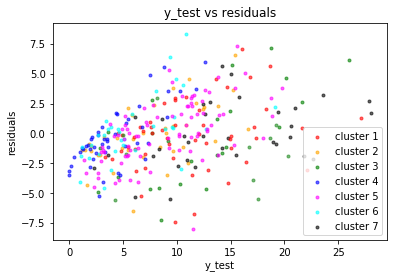

In [1388]:
model.plots()

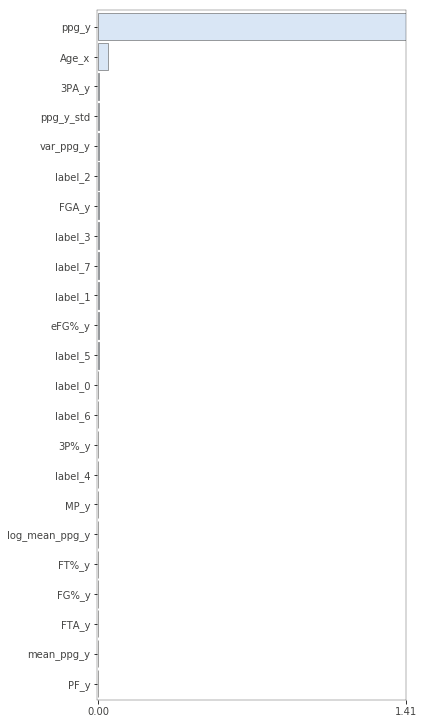

                Importance
Feature                   
ppg_y             1.41e+00
Age_x             4.33e-02
3PA_y             2.21e-03
ppg_y_std         7.68e-04
var_ppg_y         4.62e-04
label_2           4.02e-04
FGA_y             3.44e-04
label_3           2.34e-04
label_7           8.51e-05
label_1           4.51e-05
eFG%_y            4.38e-05
label_5           2.13e-05
label_0           0.00e+00
label_6          -2.20e-06
3P%_y            -2.39e-05
label_4          -8.10e-05
MP_y             -1.05e-04
log_mean_ppg_y   -3.94e-04
FT%_y            -6.65e-04
FG%_y            -8.02e-04
FTA_y            -1.07e-03
mean_ppg_y       -1.63e-03
PF_y             -2.81e-03


In [1389]:
model.importance()

In [1408]:
def cross_val(df,number=5):
    score=[]
    for element in range(number):
        cross_model=ModelP(2008+element)  
        cross_model.fit(df)
        y_pred=cross_model.model_predict()
        score.append(cross_model.score())
    return (score) 

In [1409]:
scores=cross_val(dfi)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


The MSE is : 9.602701133445807
The benchmark MSE is : 10.53196412029064


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


The MSE is : 8.726737962515688
The benchmark MSE is : 9.13363981371178


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


The MSE is : 8.383274339098229
The benchmark MSE is : 9.26076507629748


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


The MSE is : 8.438594631086993
The benchmark MSE is : 10.373275438983228


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


The MSE is : 7.4674771986233734
The benchmark MSE is : 8.972459993683001


In [1400]:
dfi['Year_x'].max()

2017

In [1414]:
np.sqrt(np.mean(scores))

2.9195474054986703